In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir('/content/drive/My Drive/Privacy_presearving')

In [ ]:
!pip install sdv

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.1/137.1 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.9/11.9 MB 43.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.8/74.8 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 170.7/170.7 kB 22.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 59.5 MB/s eta 0:00:00


In [ ]:
import sdv
print(sdv.__version__)

1.8.0


In [ ]:
from sdv.single_table import CTGANSynthesizer

In [ ]:
import pandas as pd
# Load the dataset
data = pd.read_csv('adult.csv')
#metadata.detect_from_csv('adult.csv')
selected_columns = ["age", "native_country", "race", "sex", "income"]
data = data[selected_columns]

In [ ]:
from sdv.metadata import SingleTableMetadata
metadata = SingleTableMetadata()

In [ ]:
metadata.detect_from_dataframe(data)

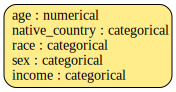

In [ ]:
metadata.visualize()

In [ ]:
z_score_threshold = 3

# Calculate z-scores for the 'age' column
z_scores = (data['age'] - data['age'].mean()) / data['age'].std()

# Identify outliers based on z-scores
outliers_age = data[abs(z_scores) > z_score_threshold]

# Remove outliers from the DataFrame
data_without_outliers_in_age = data.drop(outliers_age.index)

# Identify minority class based on 'race'
minority_class_race = data_without_outliers_in_age.groupby(['race']).size().idxmin()
minority_class_race_data = data_without_outliers_in_age[data_without_outliers_in_age['race'] == minority_class_race]

In [ ]:
minority_class_race_data.shape

(271, 5)

In [ ]:
data.shape

(32561, 5)

In [ ]:
from sdv.single_table import CTGANSynthesizer
synthesizer = CTGANSynthesizer(metadata)
synthesizer.fit(minority_class_race_data)

In [ ]:
synthetic_data = synthesizer.sample(num_rows=2000)


In [ ]:
# Combine real and synthetic data
combined_data = pd.concat([data_without_outliers_in_age, synthetic_data], ignore_index=True)

# Save the augmented dataset
combined_data.to_csv('augmented_adult_ctgan_improved.csv', index=False)


In [ ]:
from sdv.evaluation.single_table import run_diagnostic

diagnostic = run_diagnostic(
    real_data=data,
    synthetic_data=synthetic_data,
    metadata=metadata
)

In [ ]:
from sdv.evaluation.single_table import evaluate_quality

quality_report = evaluate_quality(
    data,
    synthetic_data,
    metadata
)

Generating report ...
(2/2) Evaluating Column Pair Trends: : 100%|██████████| 10/10 [00:00<00:00, 21.06it/s]

Overall Score: 47.8%

Properties:
- Column Shapes: 59.25%
- Column Pair Trends: 36.35%


In [ ]:
quality_report.get_details('Column Shapes')


,Column,Metric,Score
0,age,KSComplement,0.615145
1,native_country,TVComplement,0.455967
2,race,TVComplement,0.008323
3,sex,TVComplement,0.951295
4,income,TVComplement,0.931690


Use the CUDA option

In [ ]:
custom_synthesizer = CTGANSynthesizer(
    metadata,
    epochs=1000)
custom_synthesizer.fit(data)

In [ ]:
synthetic_data1 = custom_synthesizer.sample(num_rows=2000)

In [ ]:
from sdv.evaluation.single_table import evaluate_quality

quality_report = evaluate_quality(
    data,
    synthetic_data1,
    metadata
)

Generating report ...
(2/2) Evaluating Column Pair Trends: : 100%|██████████| 10/10 [00:00<00:00, 15.13it/s]

Overall Score: 84.58%

Properties:
- Column Shapes: 88.79%
- Column Pair Trends: 80.36%


In [ ]:
# Combine real and synthetic data
combined_data = pd.concat([data_without_outliers_in_age, synthetic_data1], ignore_index=True)

# Save the augmented dataset
combined_data.to_csv('augmented_adult_ctgan_84-58.csv', index=False)

In [ ]:
custom_synthesizer = CTGANSynthesizer(
    metadata,
    epochs=2000,
    cuda=True)
custom_synthesizer.fit(data)

In [ ]:
synthetic_data1 = custom_synthesizer.sample(num_rows=2000)

In [ ]:
from sdv.evaluation.single_table import evaluate_quality

quality_report = evaluate_quality(
    data,
    synthetic_data1,
    metadata
)

Generating report ...
(2/2) Evaluating Column Pair Trends: : 100%|██████████| 10/10 [00:00<00:00, 27.02it/s]

Overall Score: 86.13%

Properties:
- Column Shapes: 89.92%
- Column Pair Trends: 82.34%
